<a href="https://colab.research.google.com/github/Saanimustapha/AbaloneAgePrediction/blob/main/abalone_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the necessary libraries for preprocessing and visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('abalone.csv')

## Number of rows and columns in the data set

In [ ]:
data.shape

(4177, 9)

## Checking for missing values. In this dataset, there are no missing values as shown below.

In [ ]:
data.isna().sum()

sex                0
 length            0
 diameter          0
 height            0
 whole_weight      0
 shucked_weight    0
 viscera_weight    0
 shell_weight      0
 rings             0
dtype: int64

## Checking the data type of each column

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4177 non-null   object 
 1    length          4177 non-null   float64
 2    diameter        4177 non-null   float64
 3    height          4177 non-null   float64
 4    whole_weight    4177 non-null   float64
 5    shucked_weight  4177 non-null   float64
 6    viscera_weight  4177 non-null   float64
 7    shell_weight    4177 non-null   float64
 8    rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


## Checking the number of distinct categories of the sex column

In [ ]:
data["sex"].unique()

array(['M', 'F', 'I'], dtype=object)

## Checking various statistical measures of each column

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
whole_weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
shucked_weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
viscera_weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
shell_weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


## A function to draw a countplot of each sex to determine if the dataset is balanced or not

In [ ]:
def count_plot_with_counts(data, x, figsize=(5, 5), palette='Set2'):
    plt.figure(figsize=figsize)

    # Create the count plot with hue=x and disable the legend
    ax = sns.countplot(x=x, data=data, palette=palette, hue=x, legend=False)

    # Add counts above the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.show()

## Plotting the countplot. Since the difference between the three categories is small, the dataset is balanced.

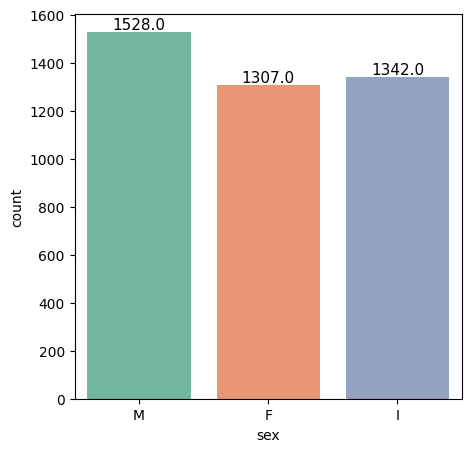

In [ ]:
count_plot_with_counts(data,"sex")

## Plotting a pairplot to view the correlation between each pair of features in the dataset.

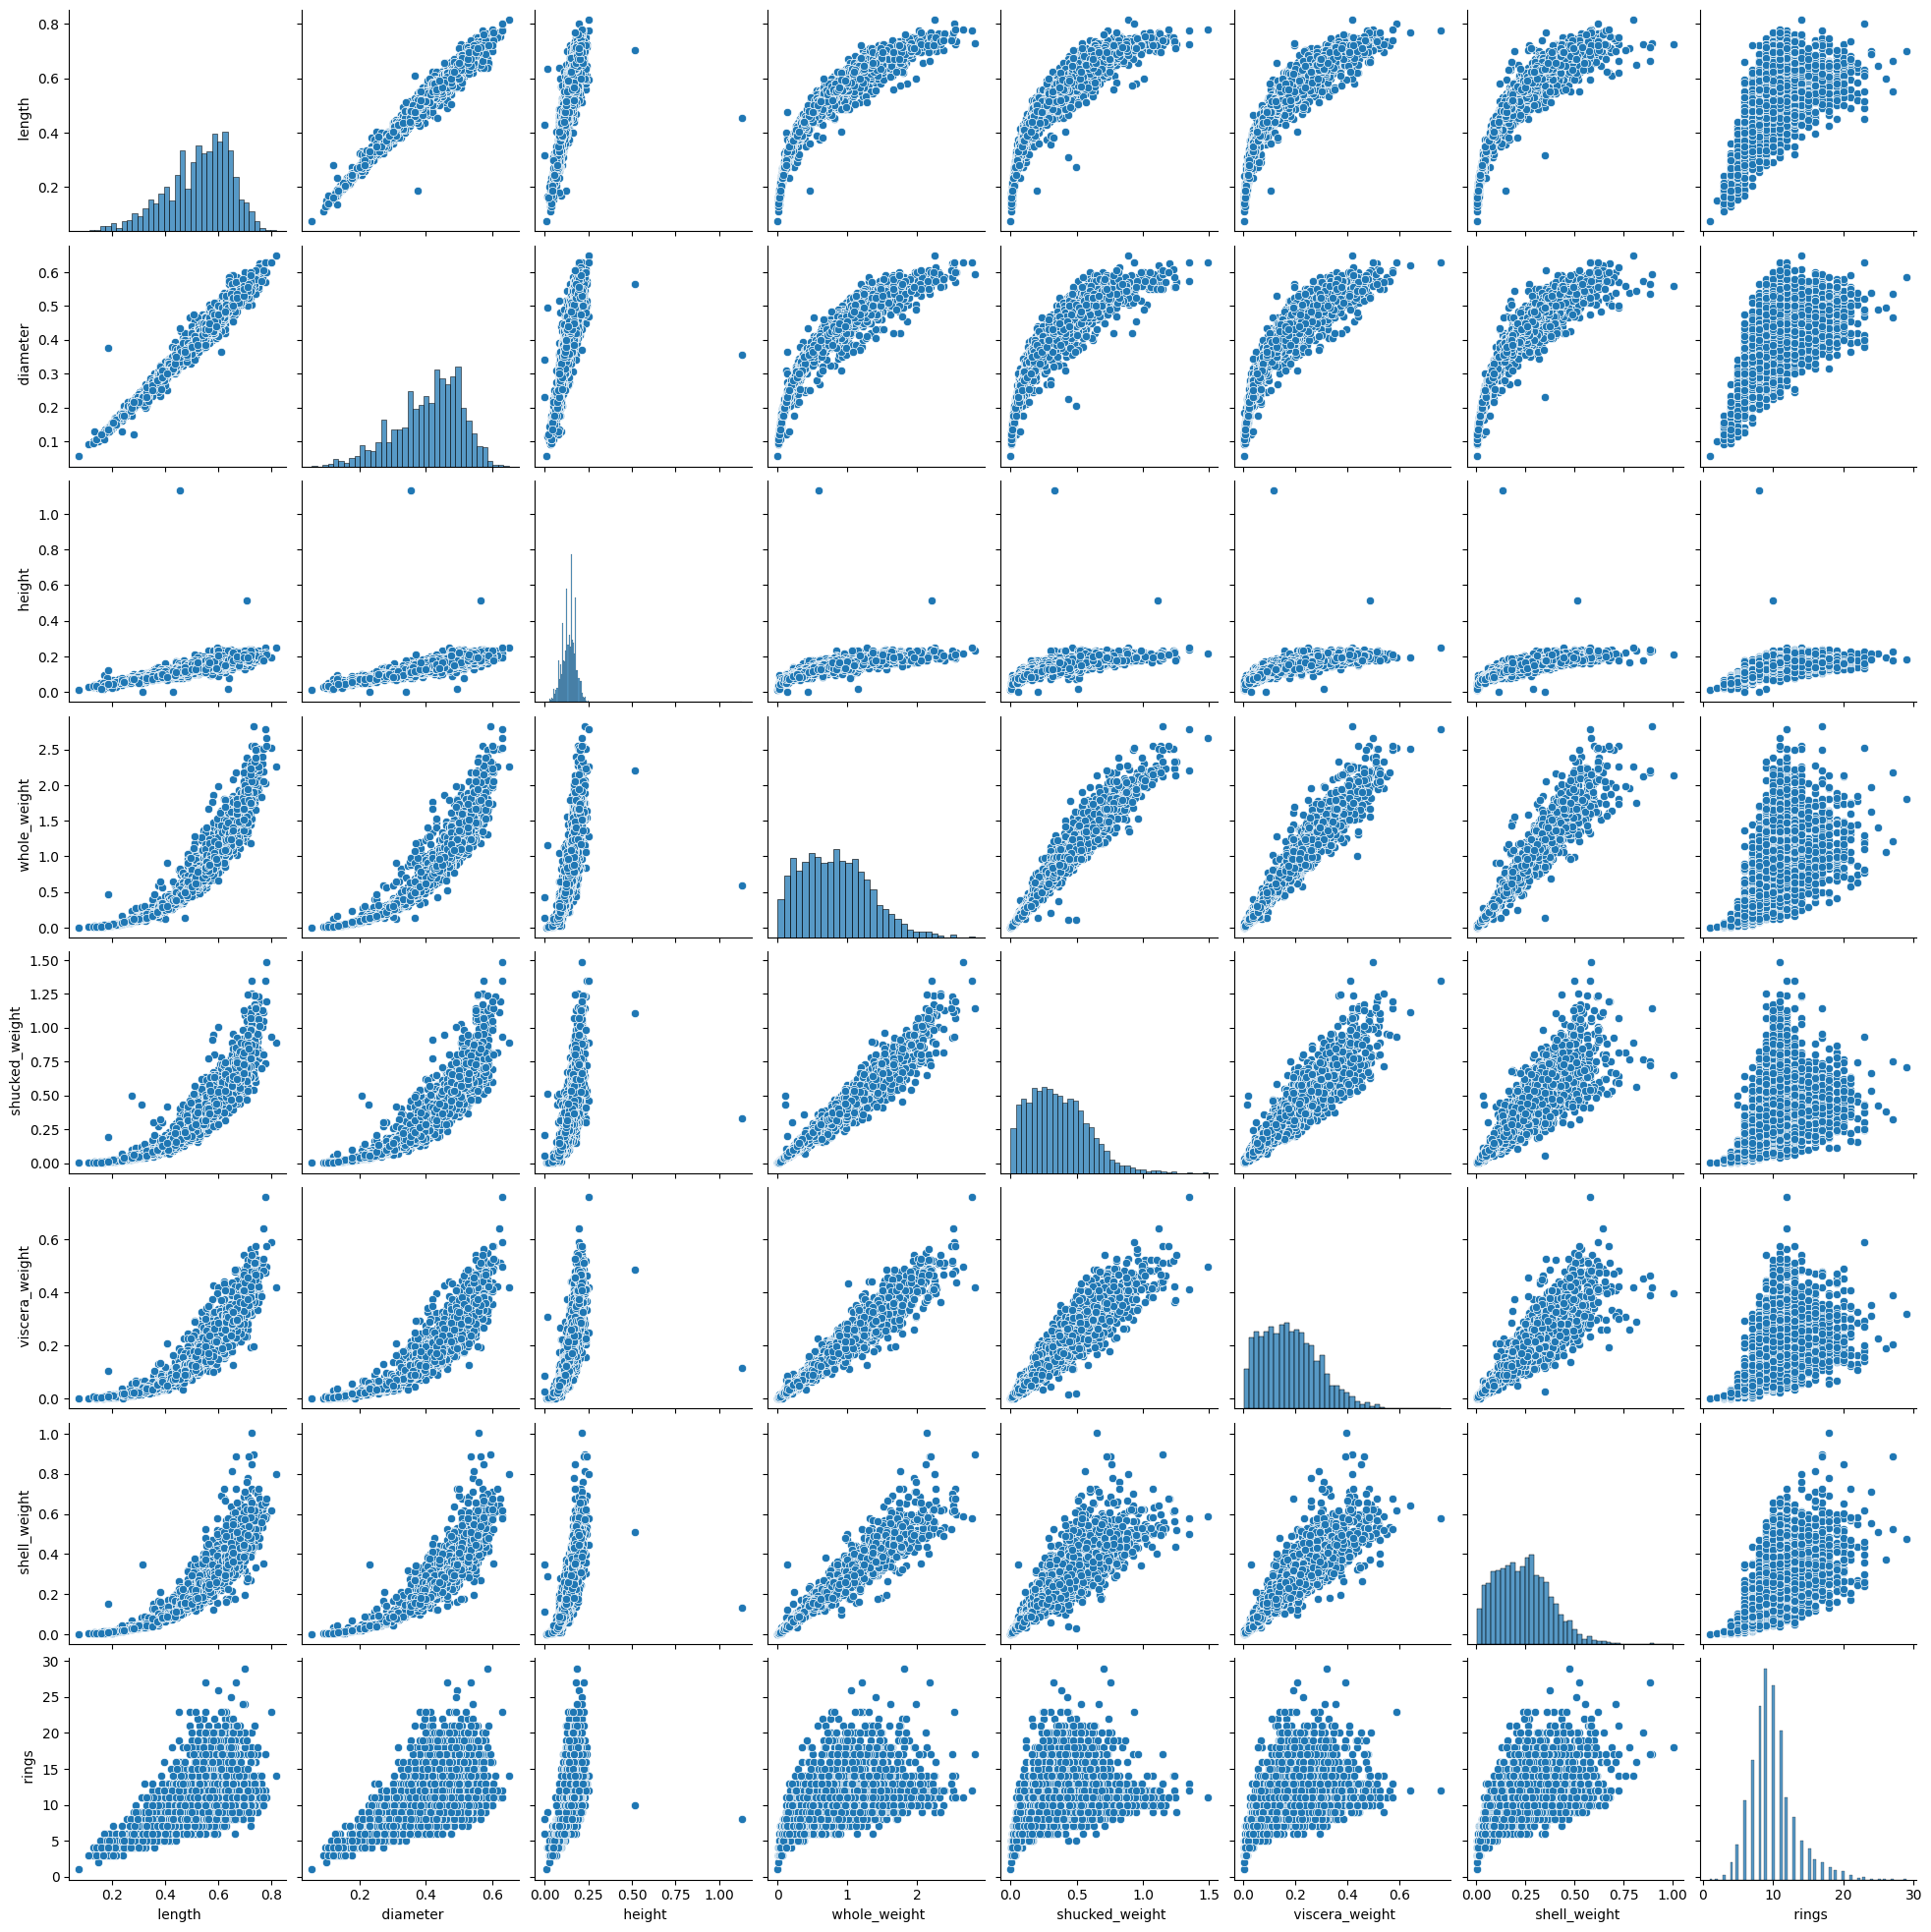

In [ ]:
sns.pairplot(data)

## Plotting a heatmap for the dataset to estimate the correlation coefficient between the pair of features

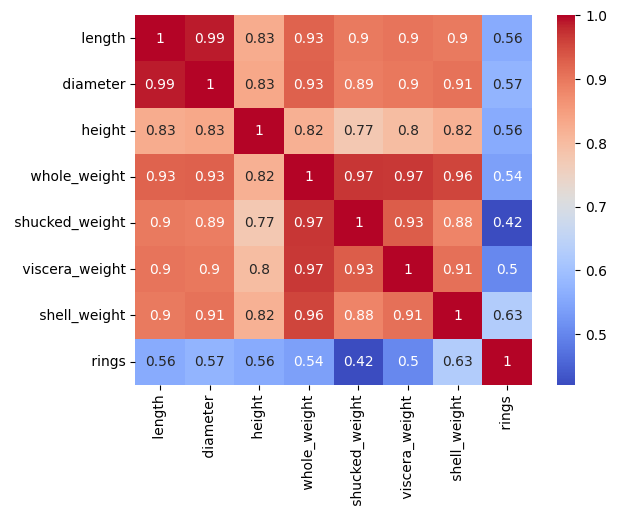

In [ ]:
numerical_features = data.iloc[:,1:]
correlation_matrix = numerical_features.corr()

sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")

plt.show()

## Function to draw boxplot and corresponding histogram for each feature

In [ ]:
import matplotlib.pyplot as plt
#function for plotting features using histogram and boxplot
def histogram_boxplot(data, feature, figsize=(5, 5), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="green"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="red", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

## Calling the function for each feature and identifying all outliers from the boxplot




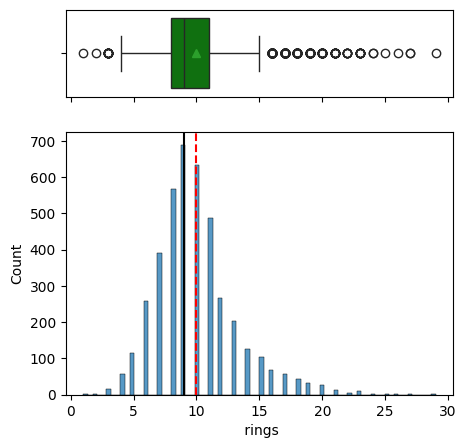

In [ ]:
histogram_boxplot(data,' rings')

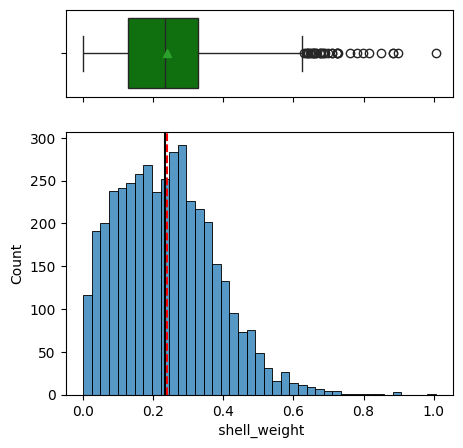

In [ ]:
histogram_boxplot(data,' shell_weight')

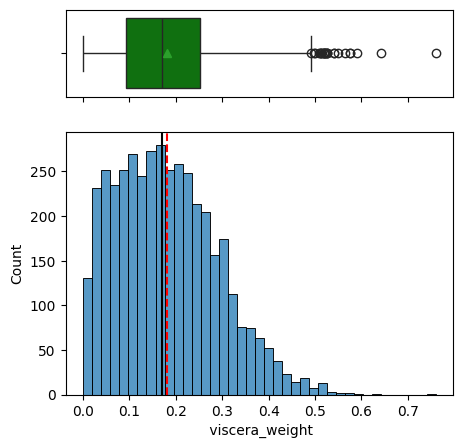

In [ ]:
histogram_boxplot(data,' viscera_weight')

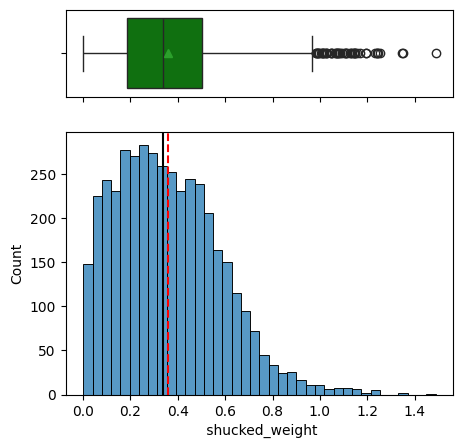

In [ ]:
histogram_boxplot(data,' shucked_weight')

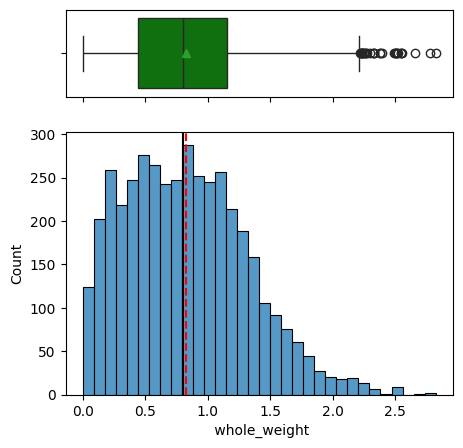

In [ ]:
histogram_boxplot(data,' whole_weight')

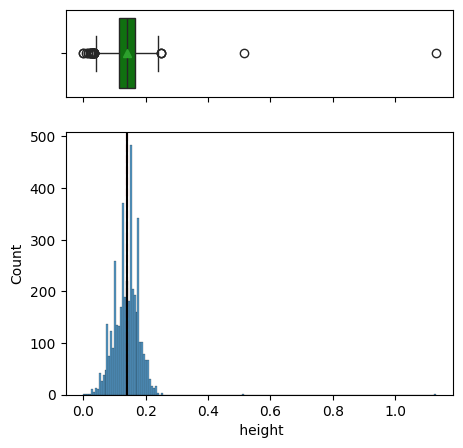

In [ ]:
histogram_boxplot(data,' height')

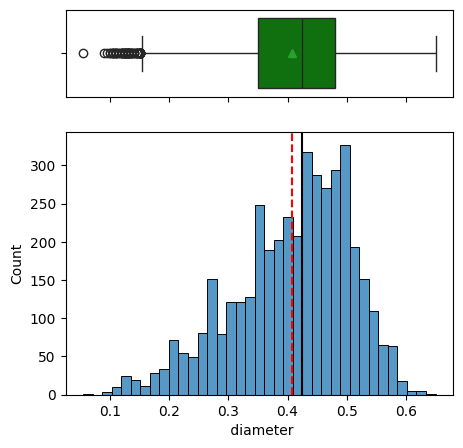

In [ ]:
histogram_boxplot(data,' diameter')

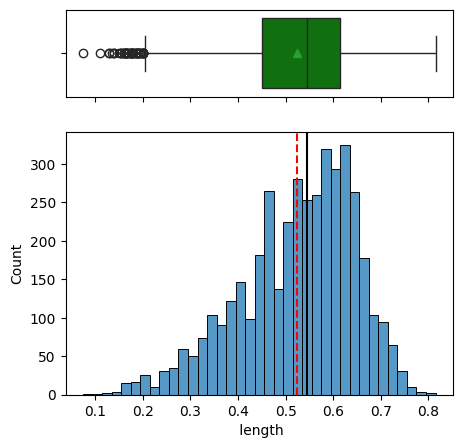

In [ ]:
histogram_boxplot(data,' length')

## Creating feature variable array and target variable vector

In [ ]:
features = np.array(data.iloc[:,:-1])
target = np.array(data.iloc[:,-1:])

## Printing the feature matrix

In [ ]:
features

array([['M', 0.455, 0.365, ..., 0.2245, 0.101, 0.15],
       ['M', 0.35, 0.265, ..., 0.0995, 0.0485, 0.07],
       ['F', 0.53, 0.42, ..., 0.2565, 0.1415, 0.21],
       ...,
       ['M', 0.6, 0.475, ..., 0.5255, 0.2875, 0.308],
       ['F', 0.625, 0.485, ..., 0.531, 0.261, 0.296],
       ['M', 0.71, 0.555, ..., 0.9455, 0.3765, 0.495]], dtype=object)

## Printing the target vector

In [ ]:
target

array([[15],
       [ 7],
       [ 9],
       ...,
       [ 9],
       [10],
       [12]])

## Performing onehot encoding on the categorical data 'sex' in the feature matrix.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

colTrans = ColumnTransformer(transformers = [("encoder",OneHotEncoder(),[0])], remainder = "passthrough")
features = colTrans.fit_transform(features)

## Printing the feature array with the encoded column
## Male is 001
## Female is 100
## Immature is 010

In [ ]:
features

array([[0.0, 0.0, 1.0, ..., 0.2245, 0.101, 0.15],
       [0.0, 0.0, 1.0, ..., 0.0995, 0.0485, 0.07],
       [1.0, 0.0, 0.0, ..., 0.2565, 0.1415, 0.21],
       ...,
       [0.0, 0.0, 1.0, ..., 0.5255, 0.2875, 0.308],
       [1.0, 0.0, 0.0, ..., 0.531, 0.261, 0.296],
       [0.0, 0.0, 1.0, ..., 0.9455, 0.3765, 0.495]], dtype=object)